In [ ]:
!pip install split-folders
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("../input/rocks-location/dataset", output="dataset", seed=8888, ratio=(.95, .05), group_prefix=None) # default values

In [1]:
!pip install keras-segmentation
%env SM_FRAMEWORK=tf.keras

     |████████████████████████████████| 3.3 MB 1.2 MB/s eta 0:00:01     |████████████                    | 1.2 MB 1.2 MB/s eta 0:00:02
     |████████████████████████████████| 753 kB 6.3 MB/s eta 0:00:01
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29071 sha256=d153022b65d99dda8088fe9960c85135f3b04dadd6acfd9e247948dfeaba92dc
  Stored in directory: /root/.cache/pip/wheels/68/dc/b3/596a3e2461ba16e935ef31661c26e823f841cfb577cec4c47a
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.4.0
    Uninstalling imgaug-0.4.0:
      Successfully uninstalled imgaug-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency confli

In [ ]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=256 ,  input_height=1024, input_width=1024  )

model.train(
    train_images =  "../input/rocks-location/dataset/images",
    train_annotations = "../input/rocks-location/dataset/masks",
    checkpoints_path = "./vgg_unet_1" , epochs=7
)

# evaluating the model 
print(model.evaluate_segmentation( inp_images_dir="./dataset/val/images"  , annotations_dir="./dataset/val/masks" ) )

In [ ]:
from keras_segmentation.predict import predict_multiple


model.predict_multiple( 
	checkpoints_path=".vgg_unet_1", 
	inp_dir="./dataset/val/images", 
	out_dir="./outputs/" 
)

In [ ]:
out = model.predict_segmentation(
    inp="./dataset/val/images/51.png",
    out_fname="./out.png"
)

import matplotlib.pyplot as plt
plt.imshow(out)

In [ ]:
from keras.utils.vis_utils import plot_model
print(model.summary())
model.save('./dataset/model_augmented.h5')
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, rankdir='LR')

36it [00:00, 600.49it/s]

Copying weights 
Copied weights of 19 layers and skipped 0 layers


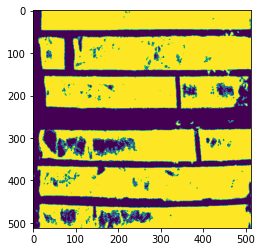

In [7]:
from keras_segmentation.predict import predict_multiple
from keras_segmentation.models.model_utils import load_model
from keras_segmentation.models.model_utils import transfer_weights
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=256 ,  input_height=1024, input_width=1024  )
old_model = load_model('../input/model-augmented/model_augmented.h5')
transfer_weights( old_model , model  )
out = model.predict_segmentation(
    inp="../input/rocks-location/dataset/images/25.png",
    out_fname="./out.png"
)

import matplotlib.pyplot as plt
plt.imshow(out)